### **1D Burgers' Equation**

The 1-D Burgers' equation is:

$$  \frac{\partial{}u}{\partial{t}} + c\frac{\partial{u}}{\partial{x}} = \nu \frac{\partial^{2}{u}}{\partial^{2}{x}}  $$

As you can see, this is simply a combination of the non-linear convection / diffusion equations.

This can be discretised as follows:

$$  \frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta{t}} + u_{i}^{n}\frac{u_{i}^{n} - u_{i - 1}^{n}}{\Delta{x}} = \nu \frac{u_{i + 1}^{n} - 2u_{i}^{n} + u_{i - 1}^{n}}{\Delta{x^{2}}}  $$

We can solve for the unknown:

$$  u_{i}^{n + 1} = u_{i}^{n} - u_{i}^{n}\frac{\Delta{t}}{\Delta{x}}(u_{i}^{n} - u_{i - 1}^{n}) + \frac{\nu\Delta{t}}{\Delta{x^{2}}}(u_{i + 1}^{n} - 2u_{i}^{n} + u_{i - 1}^{n})  $$

#### **Initial Conditions:**

$$  u = -\frac{2\nu}{\phi}\frac{\partial{\phi}}{\partial{x}} + 4  $$
$$  \phi = \exp\left(\frac{-x^{2}}{4\nu}\right) + \exp\left(\frac{-(x - 2\phi)^{2})}{4\nu}\right)  $$

This has an analytical solution given by:

$$  u = -\frac{2\nu}{\phi}\frac{\partial{\phi}}{\partial{x}} + 4  $$
$$  \phi = \exp\left(\frac{-(x - 4t)^{2}}{4\nu(t + 1)}\right) + \exp\left(\frac{-(x - 4t -2\phi)^{2})}{4\nu(t + 1)}\right)  $$

#### **Boundary Conditions:**

$$  u(0) = u(2\pi)  $$

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 4)

In [2]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

In [3]:
phiprime = phi.diff(x)
phiprime

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

In [4]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t, x, nu), u)

In [5]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = 0.07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])

In [6]:
for n in range(nt):
    
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

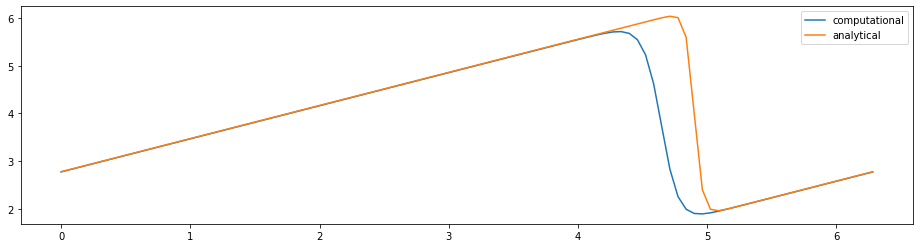

In [7]:
plt.plot(x, u, label='computational')
plt.plot(x, u_analytical, label='analytical')
plt.legend()